In [37]:
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

### Import files

In [11]:
#Import all HDF5 files from onestrain (folder) into one variableand extract tables from them one by one. Be careful to be in the filepath, add r'C: to file paths if run in Windows
datafolder = Path(r'Z:\Tracking_Data\Iris\normaltrack_14jan22\Results') 
# this structure allows you to not have to change the rest of the paths in the code, it adapts them to Windows and Mac

df = sorted(list(datafolder.glob('*_featuresN.hdf5')))
#import all HDF5 FeaturesN files for interesting strain sorted in alphabetical order

In [12]:
#Select timeseries data from files, adding all files from different videos for the same strain onto the same dataframe. To speed this part and avoid having to repeat the code I could create a def function and use map to apply it over the two Strain folders

data_feat = pd.DataFrame() #dataframe to store information 
temporary1 = []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

for iteration, i in enumerate(df): 
    data = pd.read_hdf(i, 'timeseries_data') #select all timeseries_data tables from the hdf5 documents in the folder
    data = data.assign(Path = i)
    data = data.assign(File = os.path.basename(i))
    a = os.path.basename(i)
    data = data.assign(Strain = a[0:7])
    temporary1.append(data) #append all data
data_feat = pd.concat(temporary1, ignore_index = True) #concatenate next to each other all the tables for all the files in the folder

data_feat.shape

(2751293, 156)

In [13]:
#Select trajectory data from files, adding all files from different videos for the same strain onto the same dataframe. To speed this part and avoid having to repeat the code I could create a def function and use map to apply it over the two Strain folders

traj = pd.DataFrame() #dataframe to store information 
temporary1 = []                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

for iteration, i in enumerate(df): 
    data = pd.read_hdf(i, 'trajectories_data') #select all timeseries_data tables from the hdf5 documents in the folder
    data = data.assign(File = i)
    data = data.assign(File = os.path.basename(i))
    temporary1.append(data) #append all data
traj = pd.concat(temporary1, ignore_index = True) #concatenate next to each other all the tables for all the files in the folder

traj.shape #should be same rows as _feat above

(2751293, 16)

In [14]:
#how many frames have a worm labelled?
traj['worm_label'].value_counts()

1.0    2060276
0.0     537325
3.0     147744
2.0       5948
Name: worm_label, dtype: int64

In [15]:
#keep only speed (or any other feature(s) you want)
feat_vars = pd.DataFrame()

#choose features
feat_vars['curvature_head'] = data_feat['curvature_head']
feat_vars['path_curvature_midbody'] = data_feat['path_curvature_midbody']
feat_vars['coord_x_midbody'] = data_feat['coord_x_midbody']
feat_vars['coord_y_midbody'] = data_feat['coord_y_midbody']

#basic info needed for analysis from _feat
feat_vars['Strain'] = data_feat['Strain']
feat_vars['worm_index'] = data_feat['worm_index']
feat_vars['timestamp'] = data_feat['timestamp']
feat_vars['File'] = data_feat['File']

#basic info needed for analysis from _traj
feat_vars['worm_label'] = traj['worm_label']

feat_vars = feat_vars.astype('int64', errors='ignore')
pd.set_option('display.max_colwidth', None)

feat_vars.head()

,curvature_head,path_curvature_midbody,coord_x_midbody,coord_y_midbody,Strain,worm_index,timestamp,File,worm_label
0,-0.000511,-0.000160,3103.973877,7781.540039,AQ4950_,1,0,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
1,-0.001274,-0.000164,3100.826660,7780.841309,AQ4950_,1,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
2,-0.001351,-0.000169,3100.574219,7780.819336,AQ4950_,1,2,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
3,-0.000972,-0.000173,3101.518311,7781.077148,AQ4950_,1,3,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
4,-0.000558,-0.000178,3101.826416,7781.149902,AQ4950_,1,4,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1


In [16]:
#how many frames per strain?
feat_vars['Strain'].value_counts()

AQ5117_    711658
AQ5068_    666981
N2_____    637881
AQ5018_    374095
AQ4950_    360678
Name: Strain, dtype: int64

In [17]:
#dump all trajectories that are not worms (where worm_label is not 1.0)
#note you must have manually assigned worms in tierpsy viewer, otherwise you can ommit this step
feat_vars_worms= feat_vars[feat_vars.worm_label == 1.0]
feat_vars_worms.reset_index(inplace=True)
feat_vars_worms.drop('index', axis=1, inplace=True)
feat_vars_worms.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,curvature_head,path_curvature_midbody,coord_x_midbody,coord_y_midbody,Strain,worm_index,timestamp,File,worm_label
0,-0.000511,-0.000160,3103.973877,7781.540039,AQ4950_,1,0,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
1,-0.001274,-0.000164,3100.826660,7780.841309,AQ4950_,1,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
2,-0.001351,-0.000169,3100.574219,7780.819336,AQ4950_,1,2,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
3,-0.000972,-0.000173,3101.518311,7781.077148,AQ4950_,1,3,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1
4,-0.000558,-0.000178,3101.826416,7781.149902,AQ4950_,1,4,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1


In [18]:
#make a unique index for each worm 'strain_video_index'
feat_vars_worms['unique_worm_index'] = feat_vars_worms['File'] + '_' + feat_vars_worms['worm_index'].astype(str)
#worms = feat_vars_worms.unique_worm_index.unique()
feat_vars_worms.shape

<ipython-input-18-b9bca589a284>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_vars_worms['unique_worm_index'] = feat_vars_worms['File'] + '_' + feat_vars_worms['worm_index'].astype(str)


(2060276, 10)

In [19]:
#map a coloumn for video timepoints (or other varibale if you have one)
#in this case timepoint data was encoded within the name of the file
def f(row):
    if '0to5' in row['File']:
        val = '5'
    elif '20to25' in row['File']:
        val = '25'
    elif '40to45' in row['File']:
        val = '45'
    else:
        val = '0'
    return val

#create new column 'video_timepoint' using the function above
feat_vars_worms['video_timepoint'] = feat_vars_worms.apply(f, axis=1)

feat_vars_worms.head()

#works but slow, maybe use dictionary/map instead?

<ipython-input-19-cdc62fa5d03a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_vars_worms['video_timepoint'] = feat_vars_worms.apply(f, axis=1)


,curvature_head,path_curvature_midbody,coord_x_midbody,coord_y_midbody,Strain,worm_index,timestamp,File,worm_label,unique_worm_index,video_timepoint
0,-0.000511,-0.000160,3103.973877,7781.540039,AQ4950_,1,0,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0
1,-0.001274,-0.000164,3100.826660,7780.841309,AQ4950_,1,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0
2,-0.001351,-0.000169,3100.574219,7780.819336,AQ4950_,1,2,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0
3,-0.000972,-0.000173,3101.518311,7781.077148,AQ4950_,1,3,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0
4,-0.000558,-0.000178,3101.826416,7781.149902,AQ4950_,1,4,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0


In [40]:
#use this if you want to crop video length
#dump all timestamps over the max video length
video_length = 7500 #in frames

indexNames = feat_vars_worms[(feat_vars_worms['timestamp'] > video_length)].index
feat_vars_worms.drop(indexNames , inplace=True)
feat_vars_worms.shape

(990392, 15)

In [11]:
frames = feat_vars_worms.timestamp.unique()
maxframes = frames[-1]
print ('max frames:', maxframes)

max frames: 22499


In [20]:
#Calculate distance moved between frames
feat_vars_worms['coord_x_midbody_diff'] = feat_vars_worms['coord_x_midbody'].diff()
feat_vars_worms['coord_y_midbody_diff'] = feat_vars_worms['coord_y_midbody'].diff()
feat_vars_worms['coord_x_midbody_diff_abs'] = feat_vars_worms['coord_x_midbody_diff'].abs()
feat_vars_worms['coord_y_midbody_diff_abs'] = feat_vars_worms['coord_y_midbody_diff'].abs()
feat_vars_worms['dist_moved_perframe'] = (feat_vars_worms['coord_x_midbody_diff_abs']**2) + (feat_vars_worms['coord_y_midbody_diff_abs']**2)
feat_vars_worms['dist_moved_perframe'] = np.sqrt((feat_vars_worms['dist_moved_perframe']))
feat_vars_worms.head()

<ipython-input-20-9d0fc50ed955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_vars_worms['coord_x_midbody_diff'] = feat_vars_worms['coord_x_midbody'].diff()
<ipython-input-20-9d0fc50ed955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_vars_worms['coord_y_midbody_diff'] = feat_vars_worms['coord_y_midbody'].diff()
<ipython-input-20-9d0fc50ed955>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,curvature_head,path_curvature_midbody,coord_x_midbody,coord_y_midbody,Strain,worm_index,timestamp,File,worm_label,unique_worm_index,video_timepoint,coord_x_midbody_diff,coord_y_midbody_diff,coord_x_midbody_diff_abs,coord_y_midbody_diff_abs,dist_moved_perframe
0,-0.000511,-0.000160,3103.973877,7781.540039,AQ4950_,1,0,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0,NaN,NaN,NaN,NaN,NaN
1,-0.001274,-0.000164,3100.826660,7780.841309,AQ4950_,1,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0,-3.147217,-0.698730,3.147217,0.698730,3.223848
2,-0.001351,-0.000169,3100.574219,7780.819336,AQ4950_,1,2,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0,-0.252441,-0.021973,0.252441,0.021973,0.253396
3,-0.000972,-0.000173,3101.518311,7781.077148,AQ4950_,1,3,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0,0.944092,0.257812,0.944092,0.257812,0.978661
4,-0.000558,-0.000178,3101.826416,7781.149902,AQ4950_,1,4,AQ4950_normalonfood_12jan21_1_featuresN.hdf5,1,AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1,0,0.308105,0.072754,0.308105,0.072754,0.316579


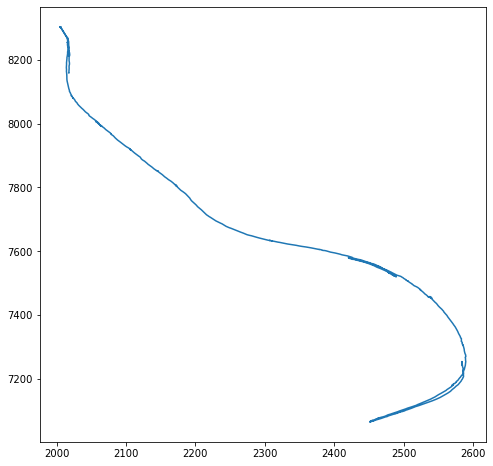

In [27]:
#view an example track
test_df = feat_vars_worms.loc[feat_vars_worms.unique_worm_index == 'AQ4950_normalonfood_12jan21_1_featuresN.hdf5_3'] #select a unique worm id here

#plot
plt.figure(figsize=(8, 8))
plt.plot(test_df['coord_x_midbody'], test_df['coord_y_midbody'])

In [28]:
# interpolate the tracks to avoid issues with missing frames
feat_vars_worms_filled = feat_vars_worms.interpolate()

<ipython-input-31-29f756869762>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_worm['coord_x_midbody_norm'] = current_worm['coord_x_midbody'] - first_x
<ipython-input-31-29f756869762>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_worm['coord_y_midbody_norm'] = current_worm['coord_y_midbody'] - first_y


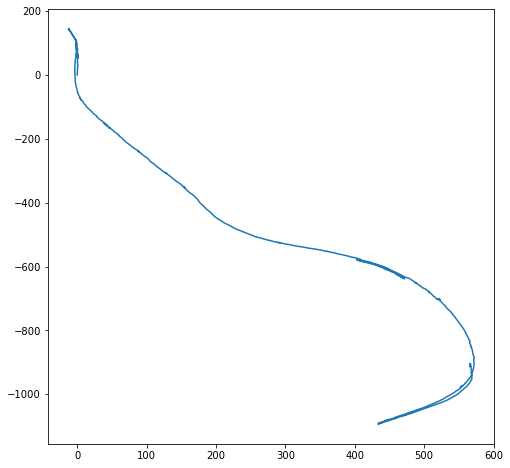

In [31]:
#view an example track
current_worm = feat_vars_worms_filled.loc[feat_vars_worms_filled.unique_worm_index == 'AQ4950_normalonfood_12jan21_1_featuresN.hdf5_3'] #select a unique worm id here

#get first x and y
first_x = current_worm['coord_x_midbody'].iloc[0]
first_y = current_worm['coord_y_midbody'].iloc[0]

#normalise to a starting point of 0,0
current_worm['coord_x_midbody_norm'] = current_worm['coord_x_midbody'] - first_x
current_worm['coord_y_midbody_norm'] = current_worm['coord_y_midbody'] - first_y

#plot
plt.figure(figsize=(8, 8))
plt.plot(current_worm['coord_x_midbody_norm'], current_worm['coord_y_midbody_norm'])

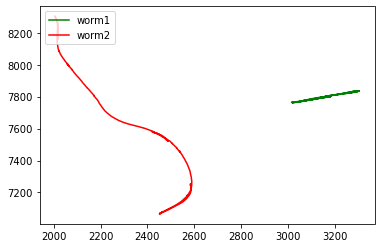

In [32]:
#plot 2 worms
w1 = feat_vars_worms_filled.loc[feat_vars_worms_filled.unique_worm_index == 'AQ4950_normalonfood_12jan21_1_featuresN.hdf5_1'] #select a unique worm id here
w2 = feat_vars_worms_filled.loc[feat_vars_worms_filled.unique_worm_index == 'AQ4950_normalonfood_12jan21_1_featuresN.hdf5_3'] #select a unique worm id here

fig, ax = plt.subplots()

ax.plot(w1['coord_x_midbody'], w1['coord_y_midbody'], color = 'green', label = 'worm1')
ax.plot(w2['coord_x_midbody'], w2['coord_y_midbody'], color = 'red', label = 'worm2')
ax.legend(loc = 'upper left')
plt.show()

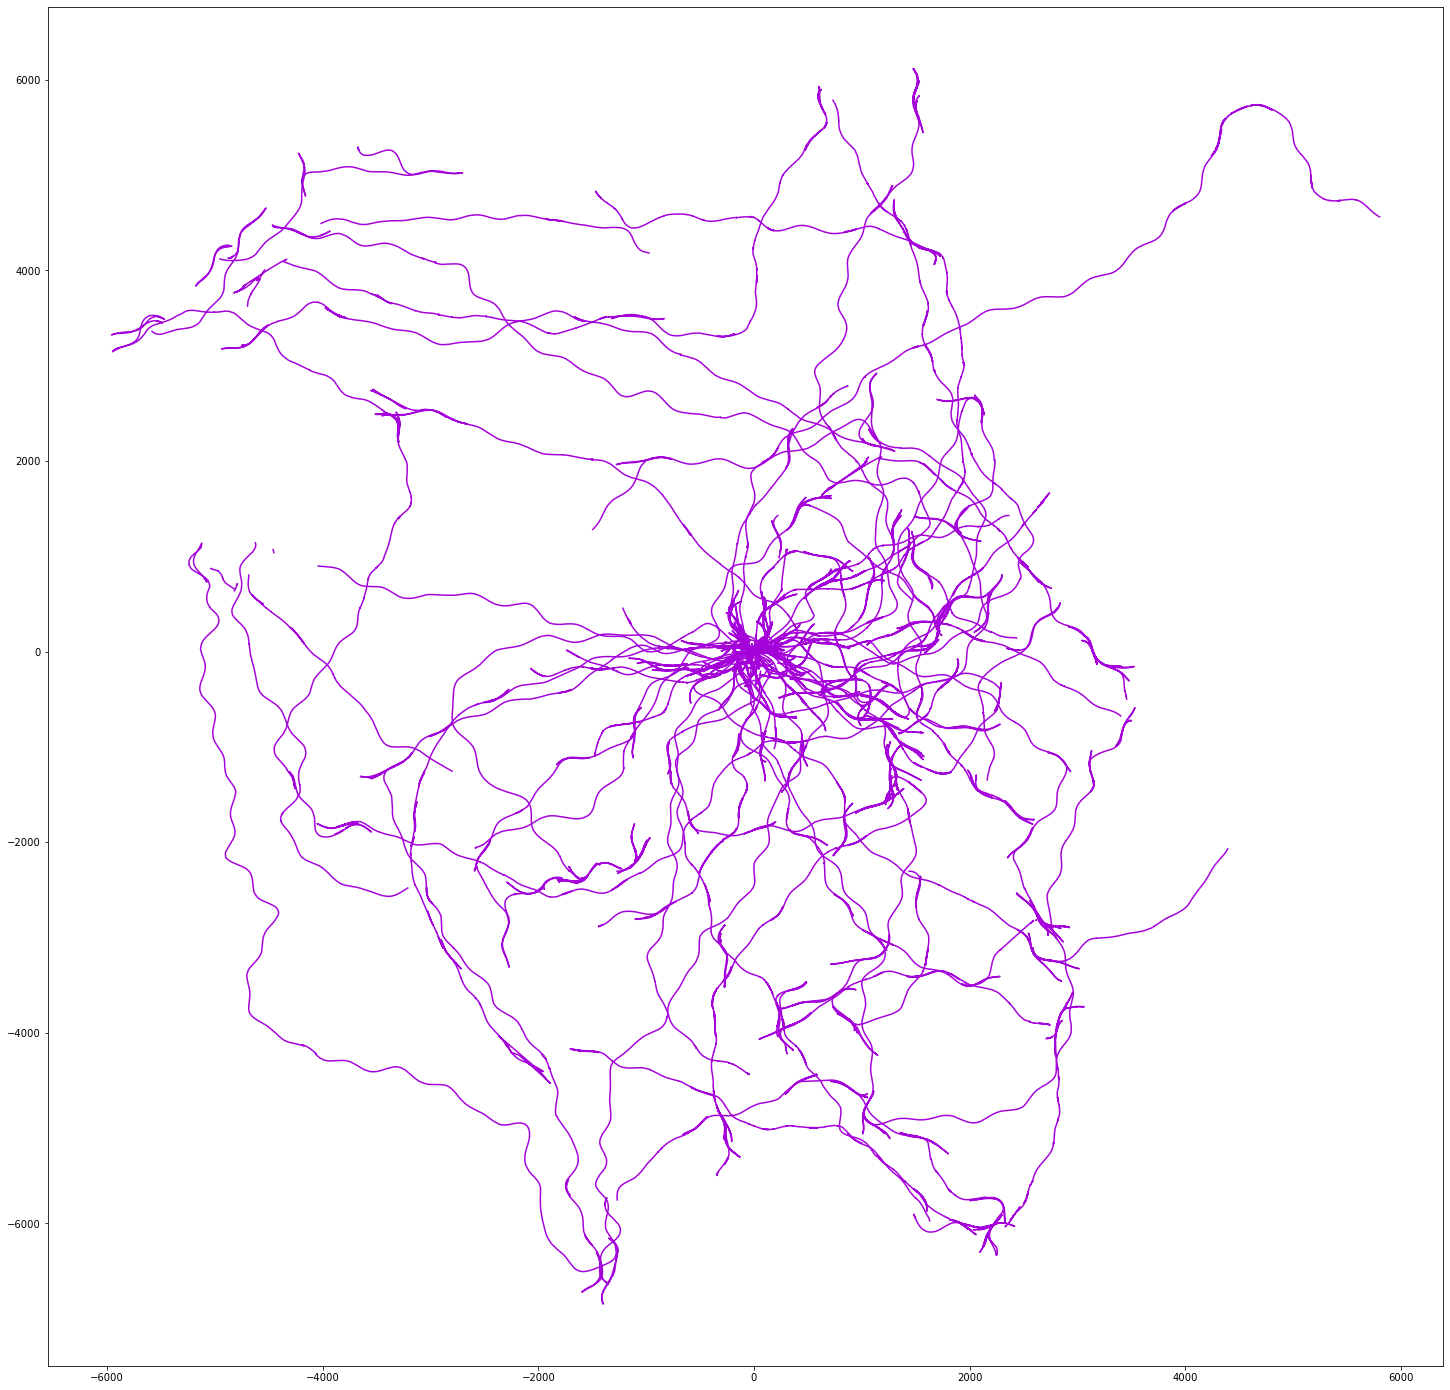

In [36]:
#plot all trajectories from a given strain normalised to 0,0 start, and coloured by timepoint, in theory this can be changed to another variable
data_used = feat_vars_worms

fig, ax = plt.subplots(figsize=(25,25))
#ax.set_xlim(-1024,1024) #set axis
#ax.set_ylim(-1024, 1024) #set axis

#select strain
strain = 'N2_____'
plotdata = data_used.loc[(data_used['Strain'] == strain)]

#select timepoint
timepoint = '0'
plotdata = plotdata.loc[(plotdata['video_timepoint'] == timepoint)]

#get list of unique IDs
worm_list = plotdata.unique_worm_index.unique()

for worm in worm_list:
    current_worm = plotdata.loc[plotdata.unique_worm_index == worm]
    current_worm = current_worm.loc[:,['coord_x_midbody', 'coord_y_midbody']]
    #get first x and y
    first_x = current_worm['coord_x_midbody'].iloc[0]
    first_y = current_worm['coord_y_midbody'].iloc[0]
    #normalise
    current_worm['coord_x_midbody_norm'] = current_worm['coord_x_midbody'] - first_x
    current_worm['coord_y_midbody_norm'] = current_worm['coord_y_midbody'] - first_y
    #plot
    ax.plot(current_worm['coord_x_midbody_norm'], current_worm['coord_y_midbody_norm'], color = '#a404d9', label = 'worm1')
    
#select strain
plotdata = data_used.loc[(data_used['Strain'] == strain)]

#select timepoint
timepoint = '45'
plotdata = plotdata.loc[(plotdata['video_timepoint'] == timepoint)]

#get list of unique IDs
worm_list = plotdata.unique_worm_index.unique()

for worm in worm_list:
    current_worm = plotdata.loc[plotdata.unique_worm_index == worm]
    current_worm = current_worm.loc[:,['coord_x_midbody', 'coord_y_midbody']]
    #get first x and y
    first_x = current_worm['coord_x_midbody'].iloc[0]
    first_y = current_worm['coord_y_midbody'].iloc[0]
    #normalise
    current_worm['coord_x_midbody_norm'] = current_worm['coord_x_midbody'] - first_x
    current_worm['coord_y_midbody_norm'] = current_worm['coord_y_midbody'] - first_y
    #plot
    ax.plot(current_worm['coord_x_midbody_norm'], current_worm['coord_y_midbody_norm'], color = '#17adab', label = 'worm1')
    
plt.show()
#plt.savefig(r'Z:\Tracking_Data\Iris\global_30nov21\Results\N2-5_45.svg')